#**Predicting Torque Based on Horsepower and Fuel Information**

In [ ]:
import pandas as pd

url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


**Shape**

In [ ]:
print(df.shape)


(5076, 18)


In [ ]:
print(df.describe)

<bound method NDFrame.describe of       Dimensions.Height  Dimensions.Length  Dimensions.Width  \
0                   140                143               202   
1                   140                143               202   
2                   140                143               202   
3                   140                143               202   
4                   140                143               202   
...                 ...                ...               ...   
5071                 13                253               201   
5072                141                249               108   
5073                160                249               108   
5074                200                210               110   
5075                200                 94               110   

     Engine Information.Driveline  \
0                 All-wheel drive   
1               Front-wheel drive   
2               Front-wheel drive   
3                 All-wheel drive   
4           

**Numerical Variables**

In [ ]:
Numerical_summary = df.select_dtypes(include=['number']).columns.tolist()
print(f"Numerical Summary: \n{Numerical_summary}")

Numerical Summary: 
['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width', 'Engine Information.Number of Forward Gears', 'Fuel Information.City mpg', 'Fuel Information.Highway mpg', 'Identification.Year', 'Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque']


**Categorical Variables**



In [ ]:
categorical_summary = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical Summary: \n{categorical_summary}")

Categorical Summary: 
['Engine Information.Driveline', 'Engine Information.Engine Type', 'Engine Information.Transmission', 'Fuel Information.Fuel Type', 'Identification.Classification', 'Identification.ID', 'Identification.Make', 'Identification.Model Year']


**CORRELATION**

In [ ]:
# Calculate the correlation matrix only for numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()


In [ ]:
# Select potential target variables
target_candidates = ["Engine Information.Engine Statistics.Torque"]
# Extract correlations of targets with other variables
correlations = correlation_matrix[target_candidates].drop(target_candidates)
print("Correlation Matrix:\n",correlations)

Correlation Matrix:
                                                  Engine Information.Engine Statistics.Torque
Dimensions.Height                                                                  -0.182470
Dimensions.Length                                                                   0.024901
Dimensions.Width                                                                    0.141035
Engine Information.Number of Forward Gears                                          0.227386
Fuel Information.City mpg                                                          -0.754664
Fuel Information.Highway mpg                                                       -0.617965
Identification.Year                                                                -0.019583
Engine Information.Engine Statistics.Horsepower                                     0.938304


**Duplicates**

In [ ]:
df.duplicated().sum()


18

In [ ]:
df = df.drop_duplicates()

In [ ]:
print(df.dtypes)

Dimensions.Height                                   int64
Dimensions.Length                                   int64
Dimensions.Width                                    int64
Engine Information.Driveline                       object
Engine Information.Engine Type                     object
Engine Information.Hybrid                            bool
Engine Information.Number of Forward Gears          int64
Engine Information.Transmission                    object
Fuel Information.City mpg                           int64
Fuel Information.Fuel Type                         object
Fuel Information.Highway mpg                        int64
Identification.Classification                      object
Identification.ID                                  object
Identification.Make                                object
Identification.Model Year                          object
Identification.Year                                 int64
Engine Information.Engine Statistics.Horsepower     int64
Engine Informa

In [ ]:
X = df[['Engine Information.Engine Statistics.Horsepower', 'Fuel Information.City mpg']]

Y = df['Engine Information.Engine Statistics.Torque']

**Missing Values**

In [ ]:
df.isnull().sum()

,0
Dimensions.Height,0
Dimensions.Length,0
Dimensions.Width,0
Engine Information.Driveline,0
Engine Information.Engine Type,0
Engine Information.Hybrid,0
Engine Information.Number of Forward Gears,0
Engine Information.Transmission,0
Fuel Information.City mpg,0
Fuel Information.Fuel Type,0


**MODEL TRAINING**

In [ ]:
# Convert to numpy arrays
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


#standardise features
scaler = StandardScaler()

# Fit and transform on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Only transform the test data
X_test_scaled = scaler.transform(X_test)

#train the model
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

#make predictions
Y_pred = model.predict(X_test_scaled)
residuals = Y_test - Y_pred


**MODEL EVALUATION**

In [ ]:
#evaluate the model performance
import numpy as np
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"\nEngine Information.Engine Statistics.Torque:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Engine Information.Engine Statistics.Torque:
Mean Absolute Error (MAE): 22.23
Mean Squared Error (MSE): 1211.53
Root Mean Squared Error (RMSE): 34.81
R-squared (R²): 0.89


**COST FUNCTION**

In [ ]:
#plot the cost function over iterations
# Simulating cost function (for visualization)
cost_history = []
num_iterations = 1000
alpha = 0.01  # Learning rate

In [ ]:
# Convert Y to numpy for processing
Y_train_np = Y_train.values.reshape(-1, 1)  # Reshape to a column vector

# Initialize weights for multi-output regression (now compatible with Y_train_np's shape)
w = np.zeros((X_train_scaled.shape[1], Y_train_np.shape[1]))

for i in range(num_iterations):
    errors = np.dot(X_train_scaled, w) - Y_train_np
    gradients = (2 / len(Y_train_np)) * np.dot(X_train_scaled.T, errors)

    # Clip gradients to avoid instability
    gradients = np.clip(gradients, -1e2, 1e2)
    w = w - alpha * gradients  # Update weights

    cost = np.mean(errors**2)  # Compute cost
    cost_history.append(cost)

    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}")

Iteration 0: Cost = 83938.2467
Iteration 100: Cost = 75266.8734
Iteration 200: Cost = 75104.8284
Iteration 300: Cost = 75060.4607
Iteration 400: Cost = 75047.3224
Iteration 500: Cost = 75043.4309
Iteration 600: Cost = 75042.2782
Iteration 700: Cost = 75041.9367
Iteration 800: Cost = 75041.8356
Iteration 900: Cost = 75041.8057


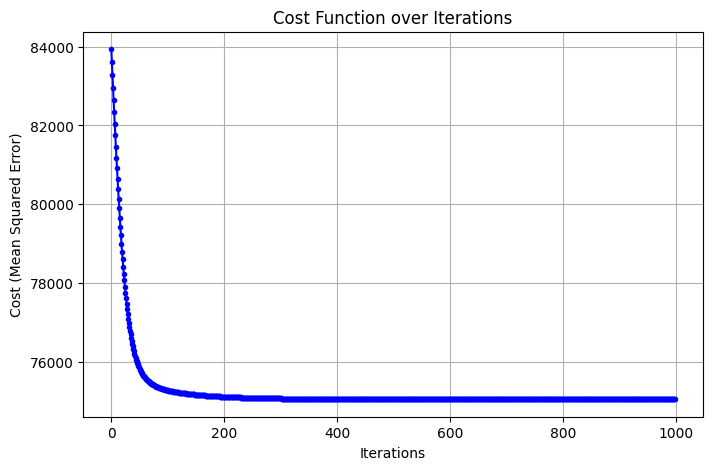

In [ ]:
# Plot cost function
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, marker='o', linestyle='-', color='b', markersize=3)
plt.xlabel("Iterations")
plt.ylabel("Cost (Mean Squared Error)")
plt.title("Cost Function over Iterations")
plt.grid(True)
plt.show()

**OUTLIERS**

In [ ]:
#IQR Method for Outlier Removal
# Assuming 'numerical_variables' from earlier in your code contains the numerical features:
num_features = Numerical_summary
Q1 = df[num_features].quantile(0.25)  # First quartile
Q3 = df[num_features].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers_iqr = ((df[num_features] < lower_bound) | (df[num_features] > upper_bound)).sum()
print("\nOutliers detected using IQR Method:\n", outliers_iqr)

# Remove outliers
df_cleaned = df[~((df[num_features] < lower_bound) | (df[num_features] > upper_bound)).any(axis=1)]
print("\nDataset size before outlier removal:", df.shape)
print("Dataset size after outlier removal:", df_cleaned.shape)


Outliers detected using IQR Method:
 Dimensions.Height                                    0
Dimensions.Length                                    0
Dimensions.Width                                     0
Engine Information.Number of Forward Gears          91
Fuel Information.City mpg                           36
Fuel Information.Highway mpg                        16
Identification.Year                                  0
Engine Information.Engine Statistics.Horsepower    124
Engine Information.Engine Statistics.Torque         36
dtype: int64

Dataset size before outlier removal: (5058, 18)
Dataset size after outlier removal: (4806, 18)


**Correlation Heatmap**

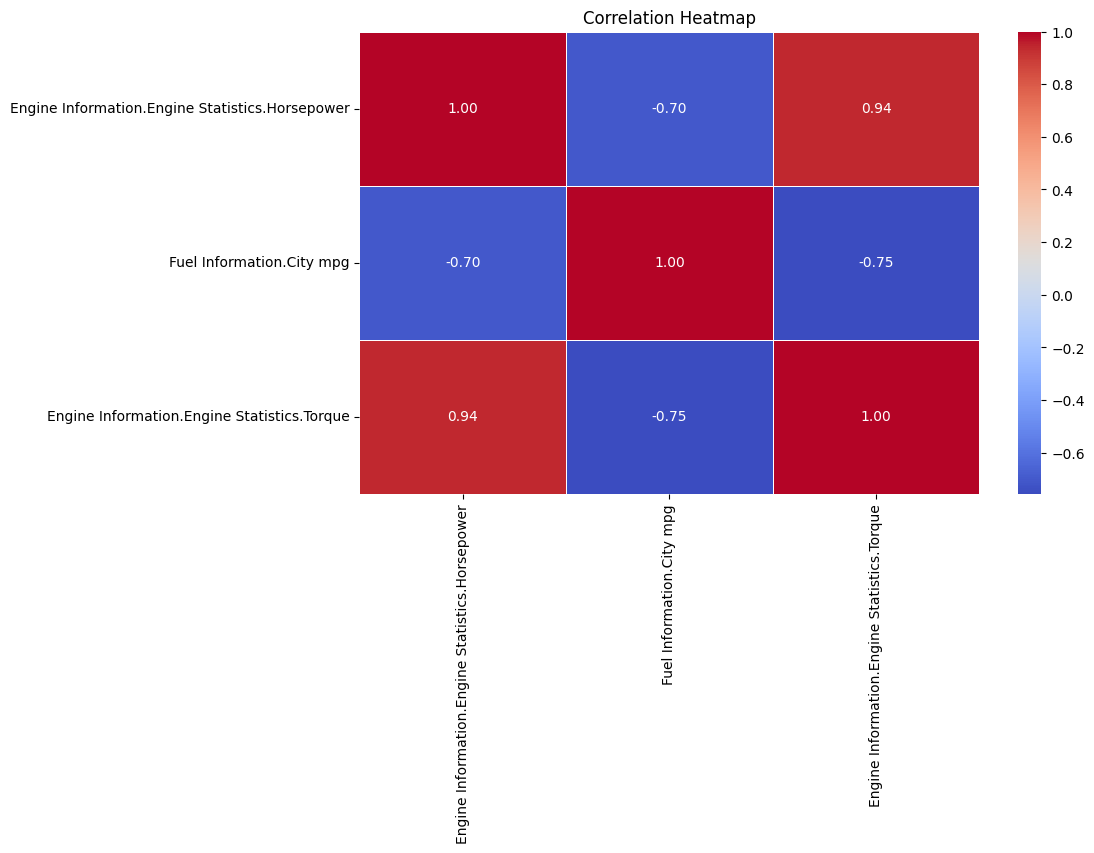

In [ ]:

import seaborn as sns
plt.figure(figsize=(10, 6))
corr_matrix = df[X.columns.tolist() + ['Engine Information.Engine Statistics.Torque']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**SCATTER PLOT**

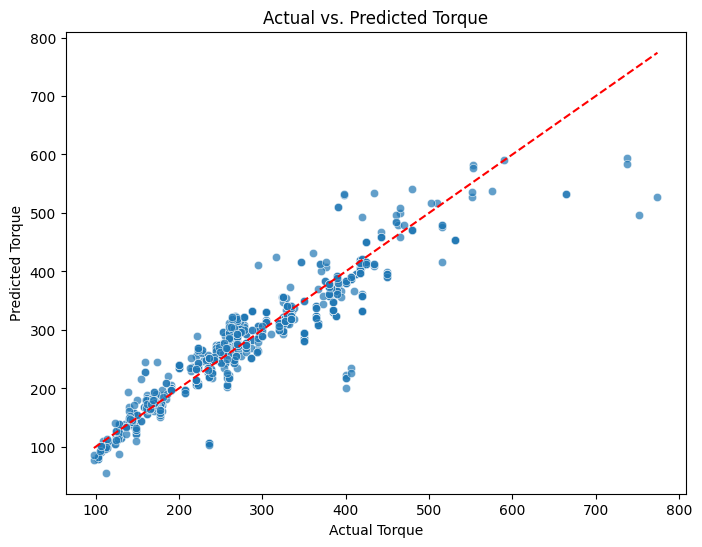

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='dashed')  # Perfect fit line
plt.xlabel("Actual Torque")
plt.ylabel("Predicted Torque")
plt.title("Actual vs. Predicted Torque")
plt.show()

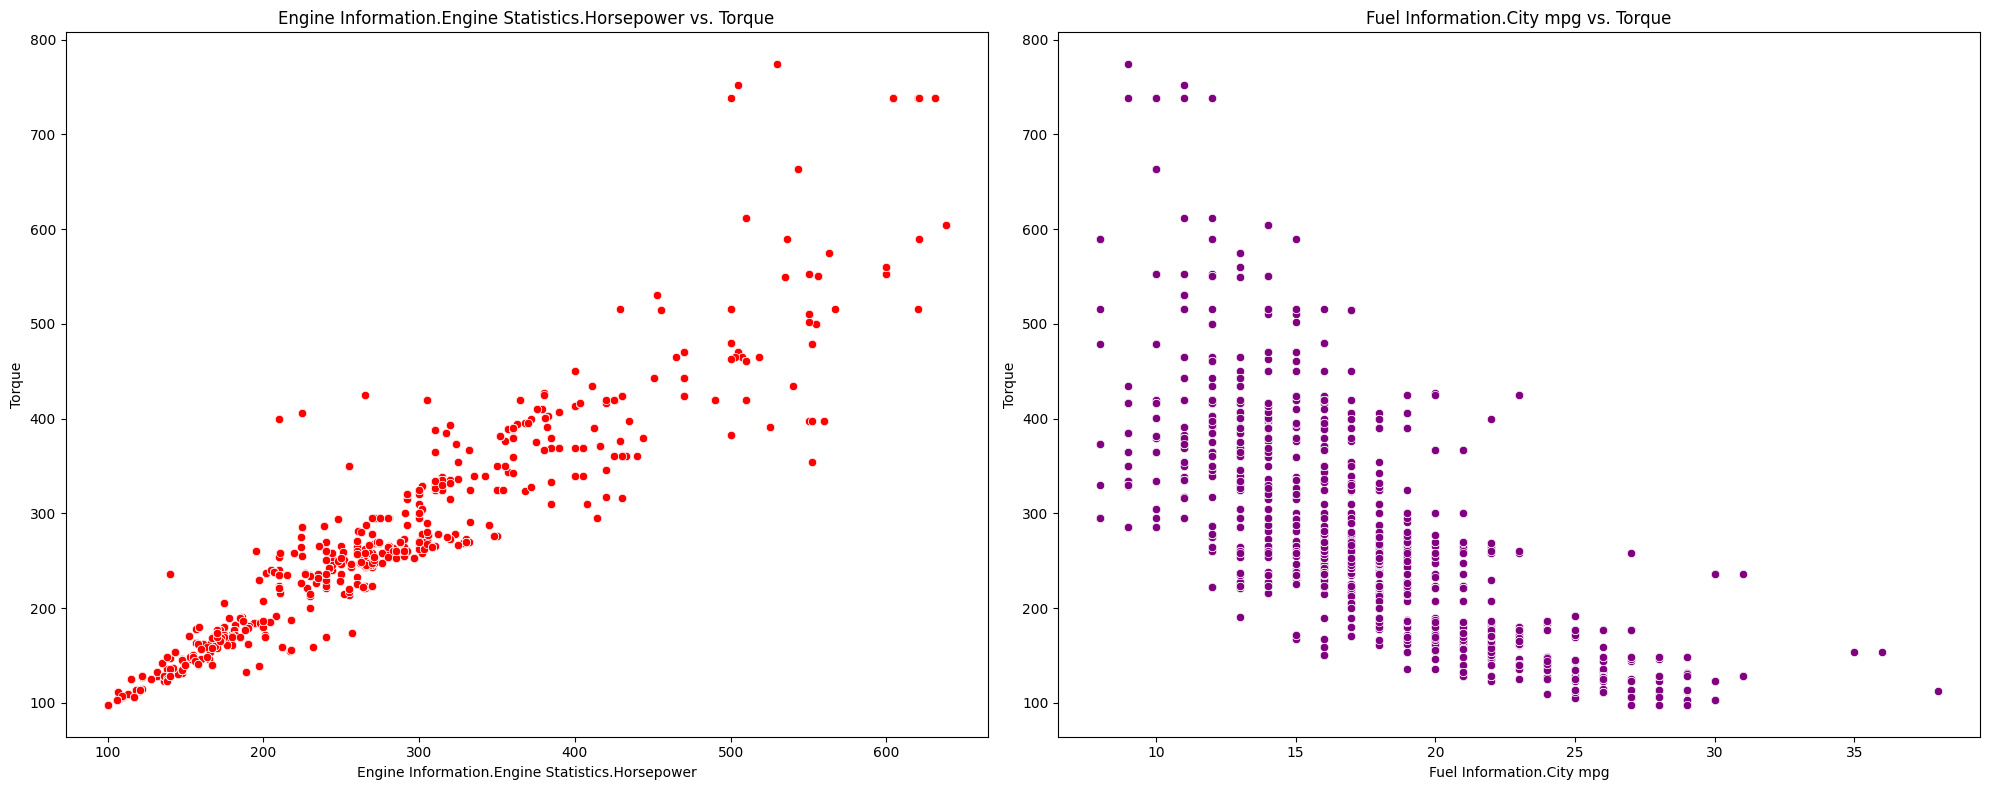

In [ ]:
#Scatterplot
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Colors for differentiation
colors = ["red", "purple"]

for i, predictor in enumerate(X):
    sns.scatterplot(x=df[predictor], y=df['Engine Information.Engine Statistics.Torque'], ax=axes[i], color=colors[i])
    axes[i].set_title(f"{predictor} vs. Torque")
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel("Torque")

plt.tight_layout()
plt.show()